In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
model = cv2.CascadeClassifier('models/haarcascade_frontalface_default.xml')

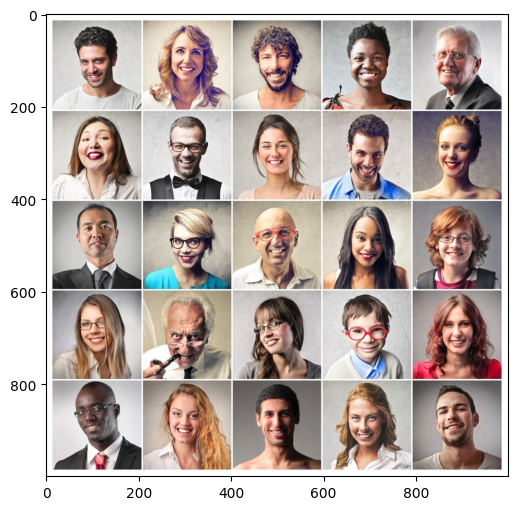

In [5]:
face_1 = cv2.imread('images/face_1.jpg')
face_1 = cv2.cvtColor(face_1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(face_1)
plt.show()

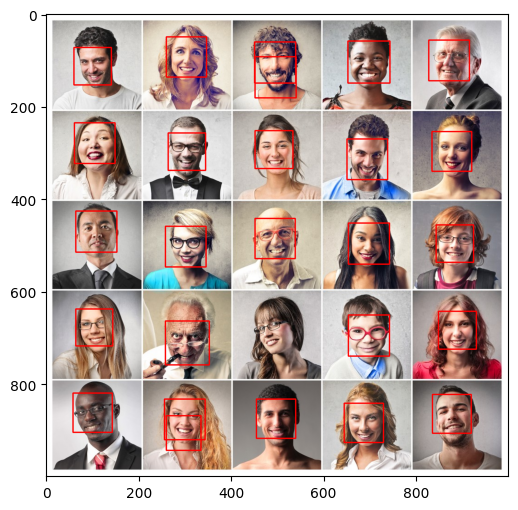

In [6]:
face_1 = cv2.imread('images/face_1.jpg')
face_1 = cv2.cvtColor(face_1, cv2.COLOR_BGR2RGB)
faces = model.detectMultiScale(face_1, minSize=(50, 50), maxSize=(100, 100))

for x, y, w, h in faces:
    cv2.rectangle(face_1, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.figure(figsize=(8, 6))
plt.imshow(face_1)
plt.show()

# Corner detection

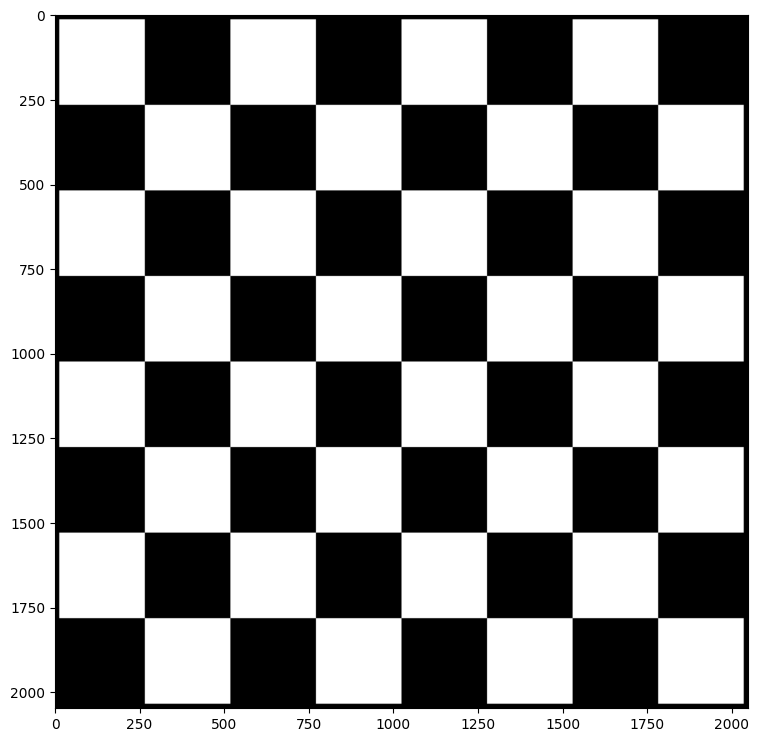

In [69]:
img = cv2.imread('images/chess_board.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(9, 9))
plt.imshow(img)
plt.show()

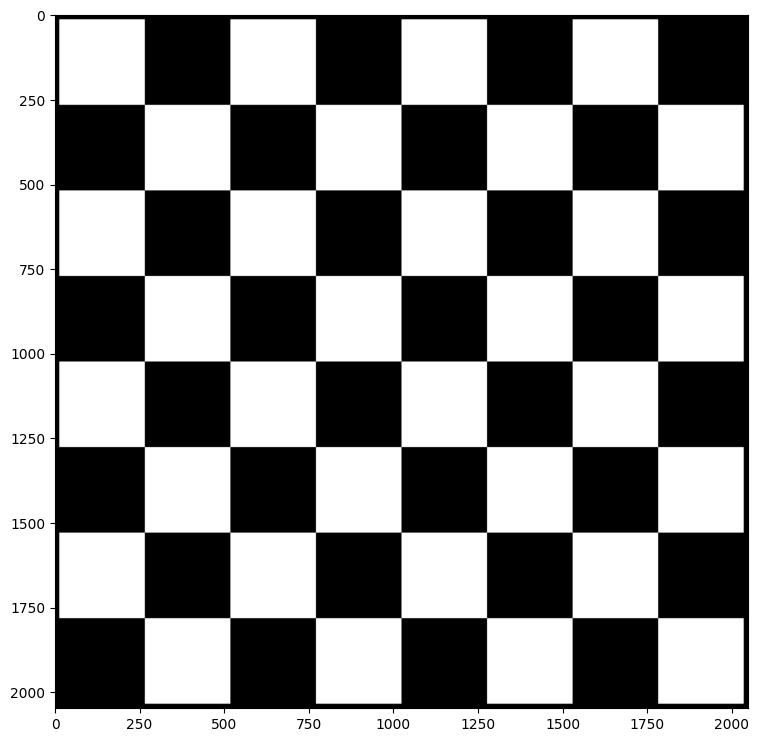

In [70]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(9, 9))
plt.imshow(img_gray, cmap='gray')
plt.show()

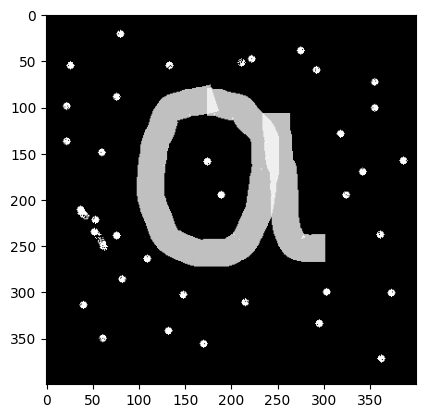

In [71]:
img_a = cv2.imread('images/a.png', 0)

plt.imshow(img_a, cmap='gray')
plt.show()

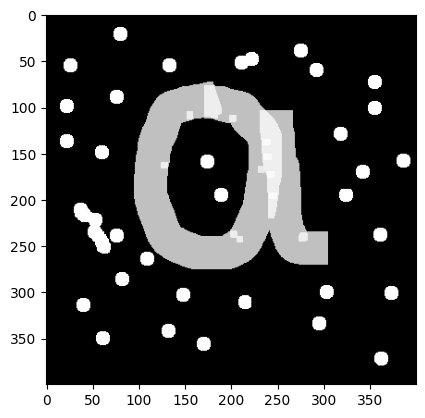

In [72]:
kernel = np.ones((7, 7), np.uint8)

img_dilate = cv2.dilate(img_a, kernel, iterations=1)

plt.imshow(img_dilate, cmap='gray')
plt.show()

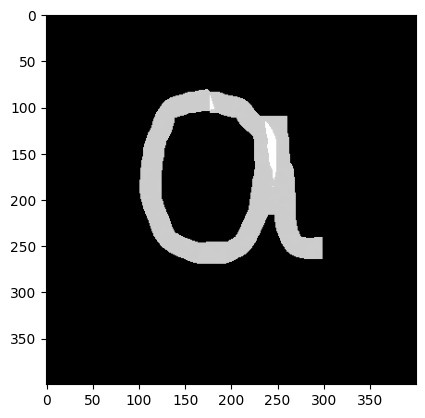

In [73]:
kernel = np.ones((7, 7), np.uint8)

img_erosion = cv2.erode(img_a, kernel, iterations=1)

plt.imshow(img_erosion, cmap='gray')
plt.show()

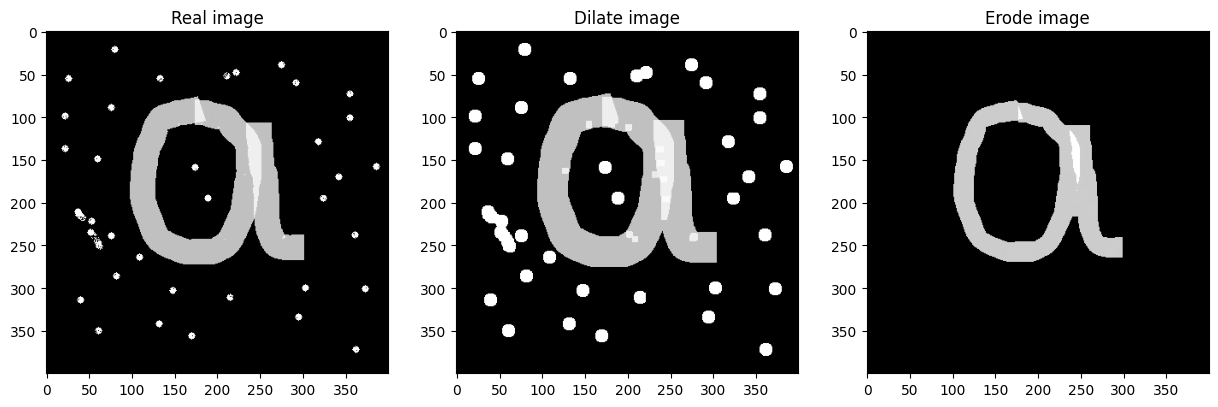

In [74]:
plt.figure(figsize=(15, 5))

plt.subplot(131), plt.title("Real image"), plt.imshow(img_a, cmap='gray')
plt.subplot(132), plt.title("Dilate image"), plt.imshow(img_dilate, cmap='gray')
plt.subplot(133), plt.title("Erode image"), plt.imshow(img_erosion, cmap='gray')

plt.show()

# cornerHarris

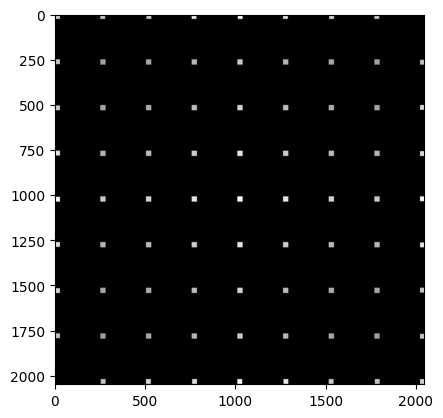

In [90]:
img_gray = np.float32(img_gray)
corner = cv2.cornerHarris(img_gray, 5, 5, 0.04)
corner = cv2.dilate(corner, np.ones((9, 9), dtype=np.uint8), iterations=3)
plt.imshow(corner, cmap='gray')
plt.show()

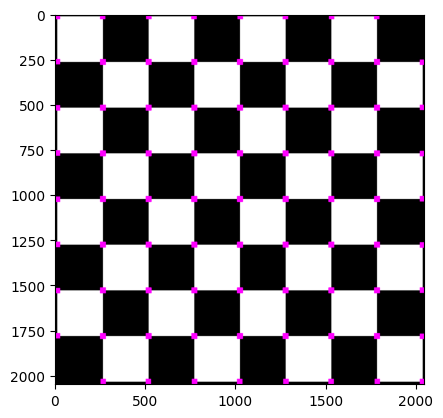

In [94]:
thresh = 0.5 * corner.max()

for i in range(0, corner.shape[0]):
    for j in range(0, corner.shape[1]):
        if corner[i, j] > thresh:
            cv2.circle(img, (j, i), 1, (255, 0, 255), 2)
plt.imshow(img)
plt.show()

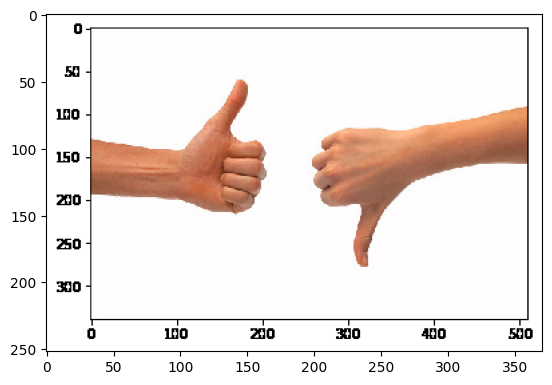

In [116]:
img_1 = cv2.imread('images/like_dislike.png')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)
plt.show()

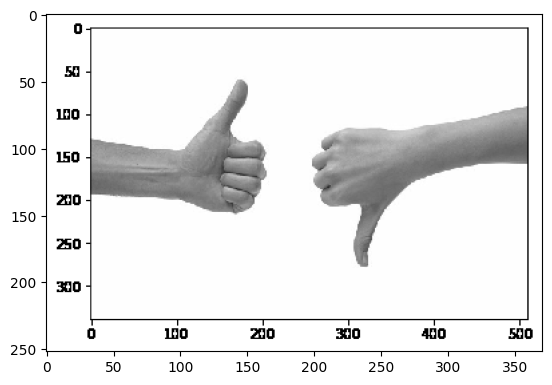

In [117]:
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_RGB2GRAY)
plt.imshow(img_1_gray, cmap='gray')
plt.show()

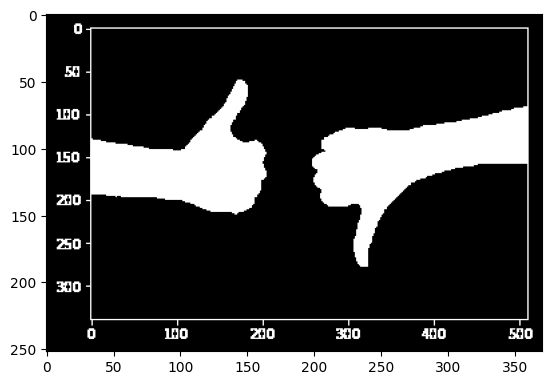

In [118]:
ret, binary_img = cv2.threshold(img_1_gray, 220, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary_img, cmap='gray')
plt.show()

In [119]:
contours, n = cv2.findContours(binary_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

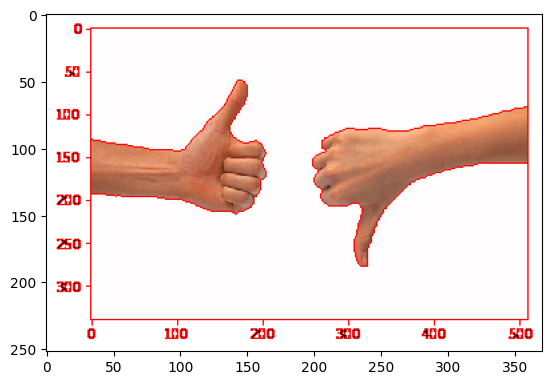

In [120]:
img_1_contour = cv2.drawContours(img_1, contours, -1, (255, 0, 0), 1)

plt.imshow(img_1_contour)
plt.show()